In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


Text(0, 0.5, 'package')

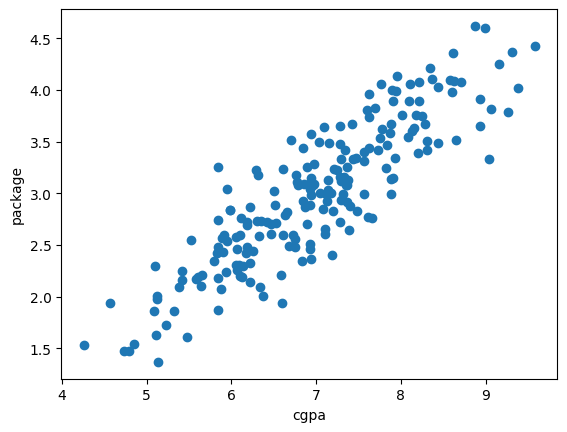

In [5]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [8]:
X = df.iloc[:, 0:1]
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
y = df.iloc[:, -1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

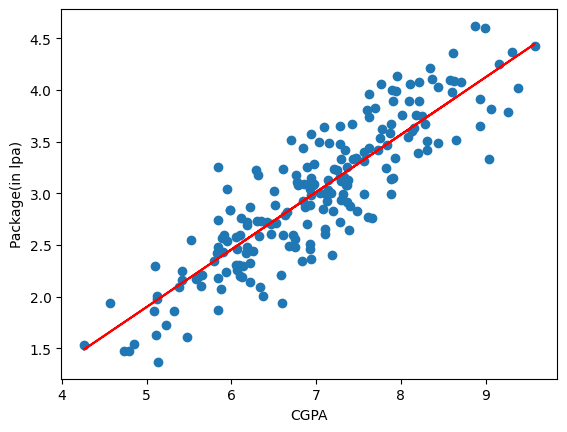

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
y_pred = lr.predict(X_test)

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61, 3.13, 3.91, 2.25, 2.3 ,
       4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08, 4.14, 2.6 , 2.44, 2.71,
       2.72, 1.63, 2.31, 2.51, 3.5 ])

In [25]:
y_pred

array([3.89015204, 3.09544039, 2.38964753, 2.57859995, 1.66162498,
       1.78388831, 2.07843178, 2.93427509, 3.76233128, 2.93983252,
       4.09021931, 3.5122472 , 2.97317706, 2.4063198 , 3.1899166 ,
       3.46778781, 1.95061103, 3.24549084, 2.97873449, 3.41777099,
       2.56192768, 3.16768691, 2.86202858, 3.12322751, 3.68452735,
       2.87314343, 3.49557493, 3.34552448, 3.91793916, 1.9672833 ,
       3.6511828 , 3.2121463 , 3.74010159, 2.78978207, 2.78422464,
       3.27327796, 3.52891947, 2.61750192, 2.66196131, 2.71753555,
       3.08988297, 4.08466188, 2.13400602, 1.95616845, 3.44000069,
       2.87870085, 2.95094737, 2.83424146, 3.51780462, 3.50668978,
       3.96239855, 3.54003432, 2.79533949, 2.60082965, 2.7508801 ,
       2.68974843, 1.96172588, 2.50635344, 2.97317706, 3.03430873])

In [26]:
print("MAE = ",mean_absolute_error(y_test,y_pred))


MAE =  0.2874910067960929


In [27]:
print("MSE = ",mean_squared_error(y_test,y_pred))


MSE =  0.1185889515124916


In [28]:
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE =  0.3443674658159385


In [29]:
print("R2_score = ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_score =  0.7736419609402847


In [30]:
X_test.shape

(60, 1)

In [31]:
1 - ((1 - r2) * (60 - 1) / (60 - 1 - 1))

0.7697392361289103

In [33]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.647697,3.26
1,5.12,0.657200,1.98
2,7.82,0.747702,3.25
3,7.42,0.761582,3.67
4,6.94,0.765323,3.57


Text(0, 0.5, 'Package(in lpa)')

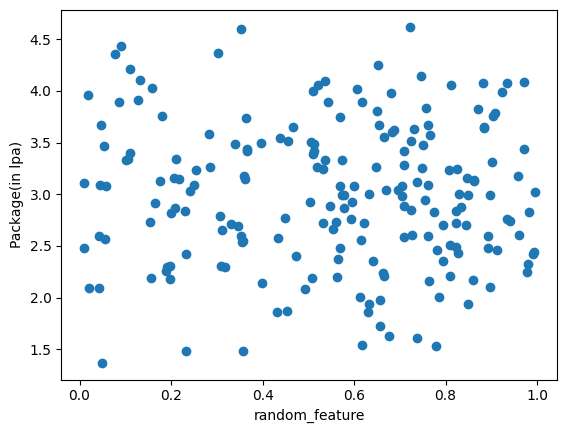

In [36]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')


In [37]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [39]:
lr = LinearRegression()


In [40]:
lr.fit(X_train,y_train)


LinearRegression()

In [41]:
y_pred = lr.predict(X_test)


In [42]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7796887929868792


In [44]:
1 - ((1 - r2) * (60 - 1) / (60 - 1 - 2))

0.7719585751969451